# Классная работа 5

**Пункты 1-2**

In [18]:
from pandas import read_csv
import pandas as pd
import sklearn.cluster as skcl
import scipy
import matplotlib.pyplot as plt

filename = 'data/beverage_r.csv'
data = read_csv(filename, sep=";")

data.head()

,numb.obs,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
0,1,1,0,0,0,1,1,0,1
1,2,1,0,0,0,1,0,0,0
2,3,1,0,0,0,1,0,0,0
3,4,0,1,0,1,0,0,1,0
4,5,1,0,0,0,1,0,0,0


**Пункт 3**

In [19]:
linkage = scipy.cluster.hierarchy.linkage(data, method='ward', metric='euclidean')
print(linkage[:5])

[[ 1.          2.          1.          2.        ]
 [20.         21.          1.          2.        ]
 [ 4.          5.          1.41421356  2.        ]
 [25.         26.          1.41421356  2.        ]
 [27.         28.          1.41421356  2.        ]]


**Пункт 4**

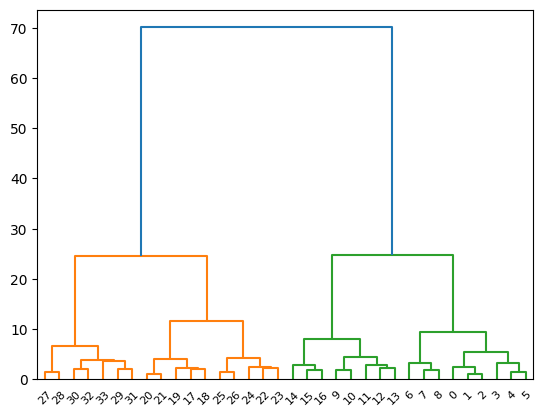

In [20]:
scipy.cluster.hierarchy.dendrogram(linkage)
plt.show()

Программа предлагает выделить 2 кластера, но скорее правильным решением будет остановиться на 3, т.к. между двумя зелеными ветвями (после первого деления) видно сильное различие в группировке.

**Пункты 5-6**

In [21]:
data1 = data.copy()
data1['CLUSTER'] = scipy.cluster.hierarchy.fcluster(linkage, 2, criterion='maxclust')
data1_gr = data1.groupby('CLUSTER')
data1_mean = data1_gr.mean()
print(data1_mean)

         numb.obs      COKE    D_COKE   D_PEPSI     D_7UP     PEPSI    SPRITE  \
CLUSTER                                                                         
1            26.0  0.588235  0.588235  0.294118  0.235294  0.411765  0.117647   
2             9.0  0.588235  0.411765  0.176471  0.176471  0.529412  0.529412   

              TAB   SEVENUP  
CLUSTER                      
1        0.352941  0.235294  
2        0.294118  0.294118  


Кластер 1: Участники фокус-группы, ответы которых вошли в данный кластер, склонны к выбору D_COKE, D_PEPSI и TAB.

Кластер 2: Участники фокус-группы предпочитают COKE, PEPSI и SPRITE другим напиткам.

Результаты кластеризации выглядят правдободобно: люди, предпочитающие диетические (D_COKE, D_PEPSI, TAB) напитки не будут выбирать продукты из других категорий, но будут держаться внутри рамок напитков с пониженным содержанием сахара и наоборот.

**Пункты 7-8**

In [22]:
data2 = data.copy()
data2['CLUSTER'] = scipy.cluster.hierarchy.fcluster(linkage, 3, criterion='distance')
data2_gr = data2.groupby('CLUSTER')
data2_mean = data2_gr.mean()
print(data2_mean)

         numb.obs      COKE    D_COKE   D_PEPSI     D_7UP     PEPSI    SPRITE  \
CLUSTER                                                                         
1            28.5  1.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
2            32.0  1.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
3            31.0  0.000000  1.000000  1.000000  0.000000  0.000000  0.000000   
4            34.0  0.000000  1.000000  1.000000  1.000000  0.000000  0.000000   
5            21.5  1.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
6            19.0  1.000000  0.666667  0.333333  0.000000  0.666667  0.000000   
7            26.5  0.000000  1.000000  0.000000  0.500000  0.000000  0.000000   
8            24.0  0.333333  1.000000  0.333333  0.666667  0.333333  0.000000   
9            16.0  0.000000  0.666667  0.333333  0.000000  0.333333  0.666667   
10           10.5  1.000000  0.000000  0.000000  0.000000  1.000000  0.500000   
11           13.0  0.333333 

**Пункт 10**

In [23]:
print(data2_gr.size())

CLUSTER
1     2
2     2
3     2
4     1
5     2
6     3
7     2
8     3
9     3
10    2
11    3
12    2
13    1
14    3
15    2
16    1
dtype: int64


**Пункт 11**

1. NUM_MEM - Память на числа
2. MATH_SK - Умение решать математические задачи
3. STR_DIA - Находчивость при прямом диалоге
4. ALG_SKL - Умение составлять алгоритмы
5. SP_CONF - Уверенность во время выступления
6. TEAM_SR - Командный дух
7. INVENTS - Находчивость
8. COOPRTN - Сотрудничество
9. COL_ACC - Признание в коллективе
10. PER_STR - Сила убеждения

In [24]:
titles = ['№', 'NAME', 'NUM_MEM', 'MATH_SK', 'STR_DIA', 'ALG_SKL', 'SP_CONF', 'TEAM_SR', 'INVENTS', 'COOPRTN', 'COL_ACC', 'PER_STR']
data_assess = pd.read_csv('data/assess.dat', sep='\t', names = titles)
data_assess = data_assess.drop(0).drop(columns=['NAME', '№'])
data_assess = data_assess.apply(pd.to_numeric, errors='coerce').astype('Int64')
data_assess.head()

,NUM_MEM,MATH_SK,STR_DIA,ALG_SKL,SP_CONF,TEAM_SR,INVENTS,COOPRTN,COL_ACC,PER_STR
1,10,10,9,10,10,10,9,10,10,9
2,10,10,4,10,5,5,4,5,4,3
3,5,4,10,5,10,4,10,5,3,10
4,10,10,9,10,10,10,9,10,10,9
5,4,3,5,4,3,10,4,10,10,5


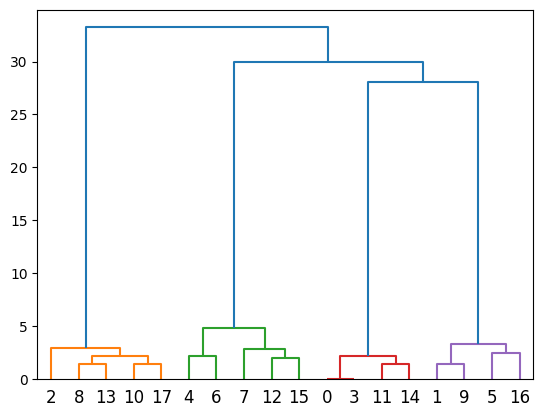

In [25]:
linkage2 = scipy.cluster.hierarchy.linkage(data_assess, method='ward', metric='euclidean')
scipy.cluster.hierarchy.dendrogram(linkage2)
plt.show()

На дендограмме видно четкое разделение на 4 кластера.

In [26]:
data3 = data_assess.copy()
data3['CLUSTER'] = scipy.cluster.hierarchy.fcluster(linkage2, 4, criterion='maxclust')
data3_gr = data3.groupby('CLUSTER')
data3_mean = data3_gr.mean()
print(data3_mean)

         NUM_MEM  MATH_SK  STR_DIA  ALG_SKL  SP_CONF  TEAM_SR  INVENTS  \
CLUSTER                                                                  
1            4.2      4.8     10.0      4.4     10.0      4.4     10.0   
2            4.8      4.4      4.0      4.0      4.2     10.0      4.4   
3           10.0     10.0      9.0     10.0     10.0      9.5     9.25   
4           10.0     10.0     4.25     10.0     4.75      4.5     3.75   

         COOPRTN  COL_ACC  PER_STR  
CLUSTER                             
1            4.0      3.8     10.0  
2           10.0     10.0      5.0  
3           9.75     10.0      9.5  
4           4.25     4.25     4.25  


Кластер 1: "Харизматики", предрасположены к коммуникации и публичным выступлениям. (STR_DIA, SP_CONF, INVENTS, PER_STR)

Кластер 2: "Командные игроки", обладают развитыми навыками работы в команде. (TEAM_SR, COOPRTN, COL_ACC)

Кластер 3: "Таланты", самые способные работники, оценка по каждому из тестов не ниже 9.0.

Кластер 4: "Математики", предпочитают заниматься математическими расчетами. (NUM_MEM, MATH_SK, ALG_SKL)

In [27]:
print(data3_gr.size())

CLUSTER
1    5
2    5
3    4
4    4
dtype: int64


## Раздел 2

**Пункты 12-15**

In [28]:
data4 = data.copy()
kMModel = skcl.KMeans(2)
kMModel.fit(data4)
cluster_labels4 = kMModel.fit_predict(data4)
print(cluster_labels4)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Users/admin/PycharmProjects/data_analysis/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/admin/PycharmProjects/data_analysis/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**Пункт 16**

In [29]:
cluster_center = kMModel.cluster_centers_
print(cluster_center)

[[26.          0.58823529  0.58823529  0.29411765  0.23529412  0.41176471
   0.11764706  0.35294118  0.23529412]
 [ 9.          0.58823529  0.41176471  0.17647059  0.17647059  0.52941176
   0.52941176  0.29411765  0.29411765]]


Первое наблюдение будет принадлежать ко второму кластеру, и наоборот, второе - к первому.

**Пункты 19-20**

In [30]:
data4['CLUSTER'] = cluster_labels4
data4_gr = data4.groupby('CLUSTER')
data4_mean = data4_gr.mean()
data4_mean.head()

,numb.obs,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
CLUSTER,,,,,,,,,
0,26.0,0.588235,0.588235,0.294118,0.235294,0.411765,0.117647,0.352941,0.235294
1,9.0,0.588235,0.411765,0.176471,0.176471,0.529412,0.529412,0.294118,0.294118


Результат деления тот же самый. Первый кластер (0) предпочитает напитки с обычным содержанием сахара, второй (1) - с пониженным (изменился только порядок кластеров).

**Пункт 21**

In [31]:
data4_gr.size()

CLUSTER
0    17
1    17
dtype: int64

**Пункт 22**

In [34]:
data5 = data_assess.copy()
kMModel5 = skcl.KMeans(4)
kMModel5.fit(data5)
cluster_labels5 = kMModel5.fit_predict(data5)
data5['CLUSTER'] = cluster_labels5
data5_gr = data5.groupby('CLUSTER')
data5_mean = data5_gr.mean()
data5_mean.head()

/Users/admin/PycharmProjects/data_analysis/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/admin/PycharmProjects/data_analysis/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,NUM_MEM,MATH_SK,STR_DIA,ALG_SKL,SP_CONF,TEAM_SR,INVENTS,COOPRTN,COL_ACC,PER_STR
CLUSTER,,,,,,,,,,
0,4.8,4.4,4.0,4.0,4.2,10.0,4.4,10.0,10.0,5.0
1,4.2,4.8,10.0,4.4,10.0,4.4,10.0,4.0,3.8,10.0
2,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25
3,10.0,10.0,9.0,10.0,10.0,9.5,9.25,9.75,10.0,9.5


Все так же выделяется 4 группы (номер из таблицы сверху в скобках): "Командные игроки" (0), "Таланты" (1), "Харизматики" (2), "Математики" (3).

In [33]:
data5_gr.size()

CLUSTER
0    5
1    4
2    5
3    4
dtype: int64